# welter
## Issue 35: Figure of postage stamps of spectral features
### Part I: Try it out

In [1]:
import os
import json
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

## Make a dataframe of the spectral features and metadata

|id|description|
|--|--|
|wl_c_obs|line center observed|
|wl_c_rest|line center in rest-frame|
|line_id|Identity of the line, if known|
|delta_wl_blue |how far to the blue of the line_center|
|delta_wl_red |how far to the red of the line_center|
|wl_blue |absolute wavelength of red limit|
|wl_red |absolute wavelength of blue limit|
|temp_affil |hot or cold|
|m_order |which IGRINS spectral order|

OK, what we need to do is modify `plot_many_mix_models.py` to:
- pick a single specific model within a parameter range or a percentile
- save with a desired file name

#### Need to re-run these before making each plot.

In [3]:
ws = np.load("../sf/m105/output/mix_emcee/run02/emcee_chain.npy")

burned = ws[:, -200:,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)

ff = 10**fc[:, 7]/(10**fc[:, 7]+10**fc[:, 5])

inds_sorted = np.argsort(ff)
ff_sorted = ff[inds_sorted]
fc_sorted = fc[inds_sorted]

#### Double check correlation plots as a sanity check for trends in $T_{\mathrm{eff}}$ and $f_\Omega$

In [4]:
#sns.distplot(ff)

In [5]:
#plt.plot(fc_sorted[:,0])
#plt.plot(fc_sorted[:,6])

In [6]:
#plt.plot(fc_sorted[:,5])
#plt.plot(fc_sorted[:,7])

In [7]:
#ax = sns.kdeplot(ff_sorted, fc_sorted[:,0], shade=True)
#ax.plot(ff_sorted[400], fc_sorted[400,0], 'b*', ms=13)
#ax.plot(ff_sorted[4000], fc_sorted[4000,0], 'k*', ms=13)
#ax.plot(ff_sorted[7600], fc_sorted[7600,0], 'r*', ms=13)

### Generate the data using the new `plot_specific_mix_model.py`

This custom Starfish python script generates model spectra at 5, 50, and 95 percentiles of fill factor, and then saves them to a csv file named `models_ff-05_50_95.csv`.

In [8]:
import pandas as pd

In [9]:
models = pd.read_csv('/Users/gully/GitHub/welter/sf/m105/output/mix_emcee/run02/models_ff-05_50_95.csv')

In [10]:
models.head()

,data,wl,model_comp05,model_cool05,model_hot05,model_comp50,model_cool50,model_hot50,model_comp95,model_cool95,model_hot95
0,0.501214,16974.816354,0.520203,0.140930,0.379273,0.506132,0.171282,0.334850,0.506534,0.214358,0.292176
1,0.498511,16974.940123,0.519670,0.141314,0.378356,0.505892,0.171548,0.334344,0.506258,0.214921,0.291337
2,0.502489,16975.063875,0.519356,0.141643,0.377713,0.505868,0.171725,0.334143,0.506166,0.215438,0.290729
3,0.502771,16975.187610,0.519251,0.141931,0.377320,0.505932,0.171810,0.334123,0.506199,0.215865,0.290333
4,0.502005,16975.311328,0.519356,0.142221,0.377135,0.506009,0.171846,0.334163,0.506375,0.216250,0.290125


### This is a complex Matplotlib layout

In [11]:
lw =1.0

In [15]:
from matplotlib import gridspec
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import ScalarFormatter

In [16]:
sns.set_context('paper')
sns.set_style('ticks')
sns.set_color_codes()

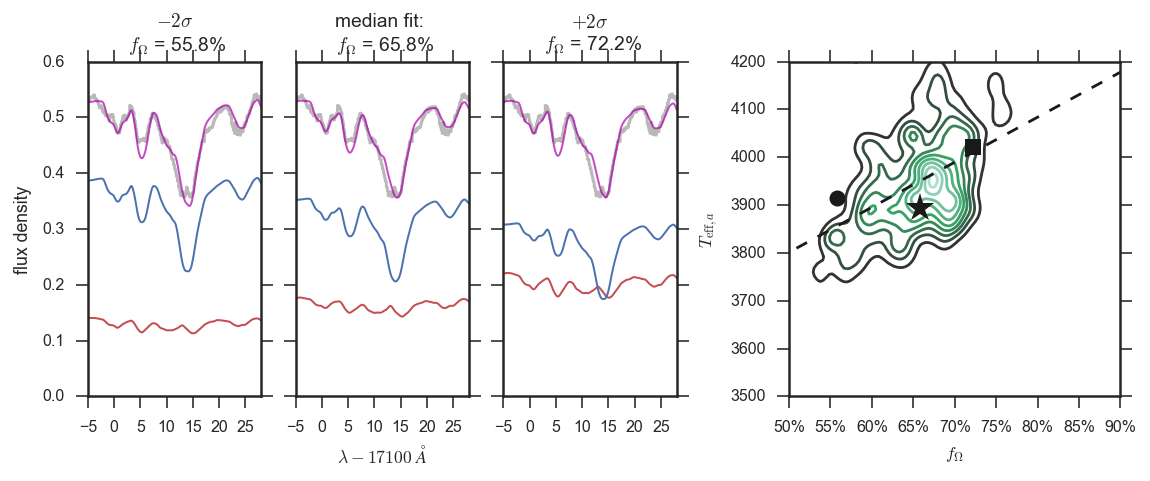

In [18]:
fig = plt.figure(figsize=(9.0, 3.0))

#fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)

lc = 17100

gs = gridspec.GridSpec(1, 5)

ax1 = fig.add_subplot(gs[0,0])
ax1.step(models.wl-lc, models.data, '-k', alpha=0.3)
ax1.plot(models.wl-lc, models.model_comp05, color='#AA00AA', linewidth=lw, alpha=0.7)
ax1.plot(models.wl-lc, models.model_cool05, color='r', linewidth=lw)
ax1.plot(models.wl-lc, models.model_hot05, color='b', linewidth=lw)
ax1.set_title('$-2\sigma$ \n $f_\Omega$ = {:0.1%}'.format(ff_sorted[400]))
ax1.set_ylabel('flux density')
ax1.set_xlim(17095-lc,17128-lc)
ax1.set_ylim(0)

ax2 = fig.add_subplot(gs[0,1])
ax2.step(models.wl-lc, models.data, '-k', alpha=0.3)
ax2.plot(models.wl-lc, models.model_comp50, color='#AA00AA', linewidth=lw, alpha=0.7)
ax2.plot(models.wl-lc, models.model_cool50, color='r', linewidth=lw)
ax2.plot(models.wl-lc, models.model_hot50, color='b', linewidth=lw)
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax2.set_title('median fit: \n $f_\Omega$ = {:0.1%}'.format(ff_sorted[4000]))
ax2.set_xlim(17095-lc,17128-lc)
ax2.set_xlabel('$\lambda - {} \;\AA$ '.format(lc))
ax2.set_ylim(0)

ax3 = fig.add_subplot(gs[0,2])
ax3.step(models.wl-lc, models.data, '-k', alpha=0.3)
ax3.plot(models.wl-lc, models.model_comp95, color='#AA00AA', linewidth=lw, alpha=0.7)
ax3.plot(models.wl-lc, models.model_cool95, color='r', linewidth=lw)
ax3.plot(models.wl-lc, models.model_hot95, color='b', linewidth=lw)
ax3.yaxis.set_major_formatter(plt.NullFormatter())
ax3.set_title('$+2\sigma$ \n $f_\Omega$ = {:0.1%}'.format(ff_sorted[7600]))
ax3.set_ylim(0)
ax3.set_xlim(17095-lc,17128-lc)

# Fit a line to the data
z = np.polyfit(ff_sorted, fc_sorted[:,0], 1)
p = np.poly1d(z)
xx = np.linspace(0, 1.0, 100)


ax4 = fig.add_subplot(gs[0,3:])
sns.kdeplot(ff_sorted, fc_sorted[:,0], shade=False, ax=ax4)
ax4.plot(ff_sorted[400], fc_sorted[400,0], 'ko', ms=8)
ax4.plot(ff_sorted[4000], fc_sorted[4000,0], 'k*', ms=15)
ax4.plot(ff_sorted[7600], fc_sorted[7600,0], 'ks', ms=8)

ax4.plot(xx, p(xx), 'k--')

ax4.set_xlim(0.5, 0.9)
ax4.set_ylim(3500, 4200)

## Not available until matplotlib 2.1!
#import matplotlib.ticker as mtick
#ax.xaxis.set_major_formatter(mtick.PercentFormatter())

ax4.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

ax4.set_ylabel('$T_{\mathrm{eff}, a}$')
ax4.set_xlabel('$f_{\Omega}$')
pos1 = ax4.get_position() # get the original position 
pos2 = [pos1.x0 + 0.06, pos1.y0, pos1.width *0.87, pos1.height] 
ax4.set_position(pos2) # set a new position
#fig.tight_layout(w_pad=0.01)
plt.savefig('../results/fig/spectral_postage_stamp_01.pdf', bbox_inches='tight')

## The end